# Uploading AOIs to the Google bucket
Polygons could be given or manually drawn using http://geojson.io/, they could also be drawn using QGIS or an automatic script. If you draw them keep them small (250 x 250 km²)

In [11]:
# Necesary imports 
import os
from ml4floods.data import utils
import geopandas as gpd
import datetime

In [12]:
# Access parameters for the ML4CC bucket
key_json = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/ml4cc-general-access_request_pays.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_json

## Upload new AOIs to the Google bucket


In [13]:
# GeoJSON file containing the new polygons to be mapped
input_file = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/AOIs_new/2022-08-08_aois.geojson"
pols_new = gpd.read_file(input_file)
print(f"Loaded {pols_new.shape[0]} polygons.")
pols_new.head()

Loaded 292 polygons.


,name,geometry
0,AUTOAOI0711,"POLYGON ((146.86330 -28.10515, 147.07330 -28.1..."
1,AUTOAOI0784,"POLYGON ((147.06330 -27.90515, 147.27330 -27.9..."
2,AUTOAOI0856,"POLYGON ((147.26330 -27.90515, 147.47330 -27.9..."
3,AUTOAOI0929,"POLYGON ((147.46330 -27.70515, 147.67330 -27.7..."
4,AUTOAOI1099,"POLYGON ((148.06330 -36.90515, 148.27330 -36.9..."


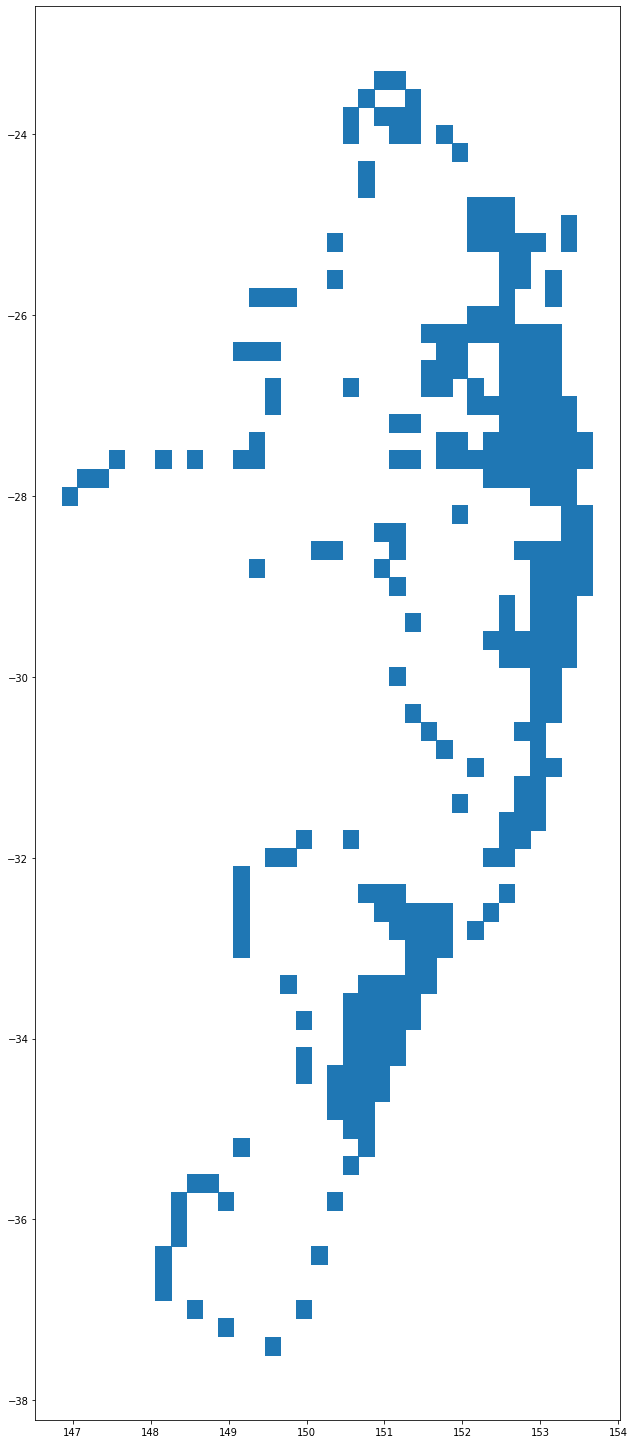

In [14]:
# Plot the new polygons
ax = pols_new.plot(figsize=(26, 26))

In [5]:
# Optional: Save to the GeoJSON to the bucket
#utils.write_geojson_to_gcp("gs://ml4cc_data_lake/0_DEV/1_Staging/operational/VAL001/aois.json", data)

In [6]:
# Details of the EMS activation and flood date start
ems_code = "EMSR570"
year = 2022
month = 2
day = 23

# Iterate through the AOIs, convert to pickles and upload
for row in pols_new.itertuples():
    aoi_code = row.name
    satellite_date = datetime.datetime(year, month, day)
    data_save = {'satellite date': satellite_date,
                 'area_of_interest_polygon': row.geometry,
                 'ems_code': ems_code,
                 'aoi_code': aoi_code,
                 'date_ems_code': satellite_date}
    gs_path = f"gs://ml4cc_data_lake/0_DEV/1_Staging/operational/{ems_code}/{aoi_code}/flood_meta/{satellite_date.strftime('%Y-%m-%d')}.pickle"
    utils.write_pickle_to_gcp(gs_path, data_save)
    print(f"Wrote {aoi_code} to GCP bucket")

Wrote AUTOAOI0711 to GCP bucket
Wrote AUTOAOI0784 to GCP bucket
Wrote AUTOAOI0856 to GCP bucket
Wrote AUTOAOI0929 to GCP bucket
Wrote AUTOAOI1099 to GCP bucket
Wrote AUTOAOI1100 to GCP bucket
Wrote AUTOAOI1101 to GCP bucket
Wrote AUTOAOI1145 to GCP bucket
Wrote AUTOAOI1174 to GCP bucket
Wrote AUTOAOI1175 to GCP bucket
Wrote AUTOAOI1176 to GCP bucket
Wrote AUTOAOI1242 to GCP bucket
Wrote AUTOAOI1249 to GCP bucket
Wrote AUTOAOI1289 to GCP bucket
Wrote AUTOAOI1321 to GCP bucket
Wrote AUTOAOI1385 to GCP bucket
Wrote AUTOAOI1392 to GCP bucket
Wrote AUTOAOI1467 to GCP bucket
Wrote AUTOAOI1478 to GCP bucket
Wrote AUTOAOI1479 to GCP bucket
Wrote AUTOAOI1480 to GCP bucket
Wrote AUTOAOI1481 to GCP bucket
Wrote AUTOAOI1482 to GCP bucket
Wrote AUTOAOI1505 to GCP bucket
Wrote AUTOAOI1511 to GCP bucket
Wrote AUTOAOI1571 to GCP bucket
Wrote AUTOAOI1577 to GCP bucket
Wrote AUTOAOI1578 to GCP bucket
Wrote AUTOAOI1583 to GCP bucket
Wrote AUTOAOI1586 to GCP bucket
Wrote AUTOAOI1600 to GCP bucket
Wrote AU

Wrote AUTOAOI2944 to GCP bucket
Wrote AUTOAOI2945 to GCP bucket
Wrote AUTOAOI2946 to GCP bucket
Wrote AUTOAOI2947 to GCP bucket
Wrote AUTOAOI2948 to GCP bucket
Wrote AUTOAOI2949 to GCP bucket
Wrote AUTOAOI2950 to GCP bucket
Wrote AUTOAOI2951 to GCP bucket
Wrote AUTOAOI2952 to GCP bucket
Wrote AUTOAOI2954 to GCP bucket
Wrote AUTOAOI2955 to GCP bucket
Wrote AUTOAOI3006 to GCP bucket
Wrote AUTOAOI3007 to GCP bucket
Wrote AUTOAOI3008 to GCP bucket
Wrote AUTOAOI3009 to GCP bucket
Wrote AUTOAOI3010 to GCP bucket
Wrote AUTOAOI3011 to GCP bucket
Wrote AUTOAOI3012 to GCP bucket
Wrote AUTOAOI3013 to GCP bucket
Wrote AUTOAOI3014 to GCP bucket
Wrote AUTOAOI3015 to GCP bucket
Wrote AUTOAOI3016 to GCP bucket
Wrote AUTOAOI3017 to GCP bucket
Wrote AUTOAOI3018 to GCP bucket
Wrote AUTOAOI3019 to GCP bucket
Wrote AUTOAOI3020 to GCP bucket
Wrote AUTOAOI3029 to GCP bucket
Wrote AUTOAOI3030 to GCP bucket
Wrote AUTOAOI3082 to GCP bucket
Wrote AUTOAOI3083 to GCP bucket
Wrote AUTOAOI3084 to GCP bucket
Wrote AU

## Update existing AOIs with new dates

In [15]:
# GeoJSON file containing the EXISTING polygons
input_file = "/data1/ownCloud/2022-07-14_AU_Flood_Maps/EMSR570/AOIs_existing/2022-08-08_aois.geojson"
pols_existing = gpd.read_file(input_file)
print(f"Loaded {pols_existing.shape[0]} polygons.")
pols_existing.head()

Loaded 663 polygons.


,aoi_code,geometry
0,AUTOAOI001,"POLYGON ((146.86329 -29.10516, 147.07329 -29.1..."
1,AUTOAOI002,"POLYGON ((146.86329 -28.90516, 147.07329 -28.9..."
2,AUTOAOI003,"POLYGON ((146.86329 -28.70516, 147.07329 -28.7..."
3,AUTOAOI004,"POLYGON ((146.86329 -28.50516, 147.07329 -28.5..."
4,AUTOAOI005,"POLYGON ((146.86329 -28.30516, 147.07329 -28.3..."


<AxesSubplot:>

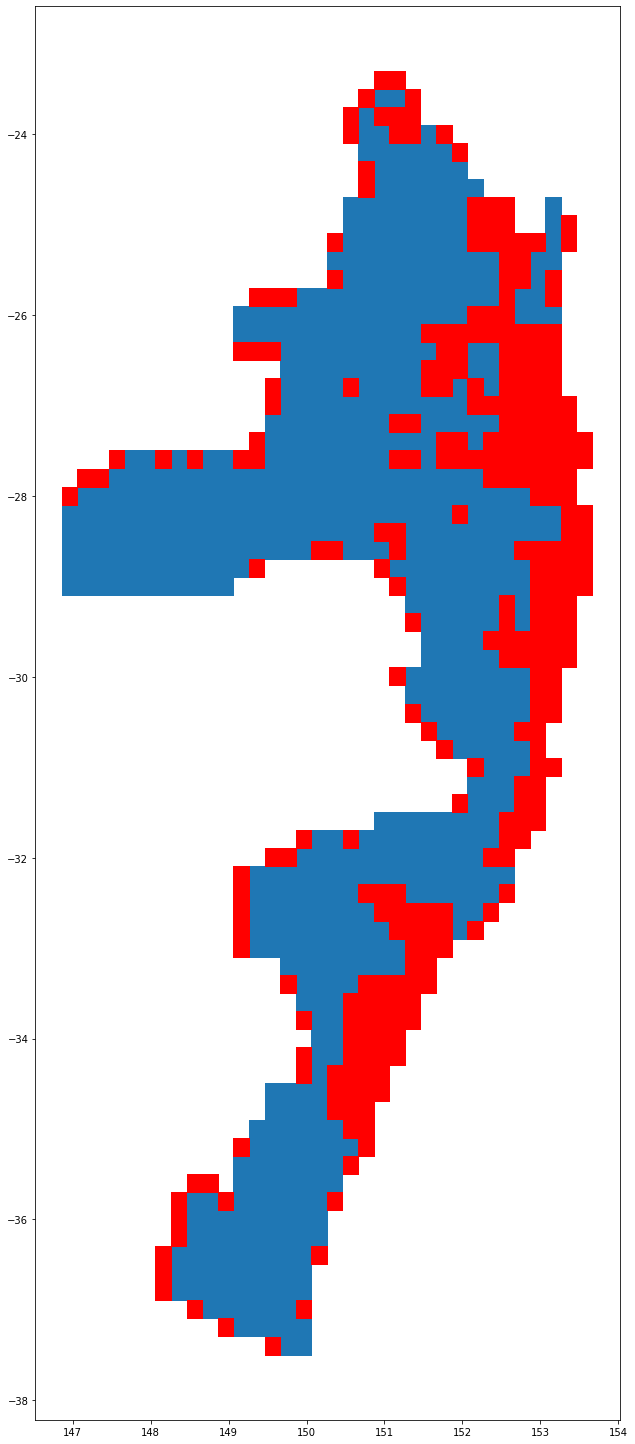

In [16]:
# Plot the existing and new polygons
ax = pols_existing.plot(figsize=(26, 26))
pols_new.plot(ax=ax, facecolor='red')

In [ ]:
# Details of the EMS activation and flood date start
ems_code = "EMSR570"
year = 2022
month = 2
day = 23

# Iterate through the AOIs, convert to pickles and upload
for row in pols_existing.itertuples():
    aoi_code = row.aoi_code
    satellite_date = datetime.datetime(year, month, day)
    data_save = {'satellite date': satellite_date,
                 'area_of_interest_polygon': row.geometry,
                 'ems_code': ems_code,
                 'aoi_code': aoi_code,
                 'date_ems_code': satellite_date}
    gs_path = f"gs://ml4cc_data_lake/0_DEV/1_Staging/operational/{ems_code}/{aoi_code}/flood_meta/{satellite_date.strftime('%Y-%m-%d')}.pickle"
    utils.write_pickle_to_gcp(gs_path, data_save)
    print(f"Wrote {aoi_code} to GCP bucket")

Wrote AUTOAOI001 to GCP bucket
Wrote AUTOAOI002 to GCP bucket
Wrote AUTOAOI003 to GCP bucket
Wrote AUTOAOI004 to GCP bucket
Wrote AUTOAOI005 to GCP bucket
Wrote AUTOAOI006 to GCP bucket
Wrote AUTOAOI007 to GCP bucket
Wrote AUTOAOI008 to GCP bucket
Wrote AUTOAOI009 to GCP bucket
Wrote AUTOAOI010 to GCP bucket
Wrote AUTOAOI011 to GCP bucket
Wrote AUTOAOI012 to GCP bucket
Wrote AUTOAOI013 to GCP bucket
Wrote AUTOAOI014 to GCP bucket
Wrote AUTOAOI015 to GCP bucket
Wrote AUTOAOI016 to GCP bucket
Wrote AUTOAOI017 to GCP bucket
Wrote AUTOAOI018 to GCP bucket
Wrote AUTOAOI019 to GCP bucket
Wrote AUTOAOI020 to GCP bucket
Wrote AUTOAOI021 to GCP bucket
Wrote AUTOAOI022 to GCP bucket
Wrote AUTOAOI023 to GCP bucket
Wrote AUTOAOI024 to GCP bucket
Wrote AUTOAOI025 to GCP bucket
Wrote AUTOAOI026 to GCP bucket
Wrote AUTOAOI027 to GCP bucket
Wrote AUTOAOI028 to GCP bucket
Wrote AUTOAOI029 to GCP bucket
Wrote AUTOAOI030 to GCP bucket
Wrote AUTOAOI031 to GCP bucket
Wrote AUTOAOI032 to GCP bucket
Wrote AU

Wrote AUTOAOI266 to GCP bucket
Wrote AUTOAOI267 to GCP bucket
Wrote AUTOAOI268 to GCP bucket
Wrote AUTOAOI269 to GCP bucket
Wrote AUTOAOI270 to GCP bucket
Wrote AUTOAOI271 to GCP bucket
Wrote AUTOAOI272 to GCP bucket
